# Data Loading

### Loading Libraries

In [1]:

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder,LabelBinarizer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report,confusion_matrix,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier,VotingClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np

### Loading dataset

In [2]:
submission_data = pd.read_csv(
    "/home/nailsonseat/Desktop/Datasets/MLP_project_datasets/test_data_v2.csv")
train_data = pd.read_csv(
    "/home/nailsonseat/Desktop/Datasets/MLP_project_datasets/train_data_v2.csv")

### Extracting features and target variable

In [3]:
X=train_data.drop('Made_Purchase',axis=1)
y=pd.DataFrame(train_data['Made_Purchase'])

# Data Exploration

### Description

The first six columns represent the different pages in the e-commerce website visited by a user from other sites.

* HomePage: Number of times visited this page

*   HomePage_Duration: Total number of duration spent on this page.

*   LandingPage: Number of times visited this page

*   LandingPage_Duration: Total number of duration spent on this page.

*   ProductDesriptionPage Number of times visited this page

*   ProductDescriptionPage_Duration: Total number of duration spent on this page.

*   GoogleMetric-Bounce Rate: Whenever a user comes to any one web-page of the website and he/she does not go to any other page and exits from the website from the same page, then this activity done by the user is called Bounce. And the percentage of the total number of times the user visiting our website and bounce it, is called Bounce Rate

*   GoogleMetric-Exit Rate: The bounce rate is calculated based on the user exiting a website after visiting one page. But some users exit from the second, third, fourth, or any other page of our website, then those visitors’ data help determine the exit rate. The percentage of the total number of times the user to our website who do not exit from the first page (Landing Page) but exit after exploring other website pages is called the Exit Rate.

*   GoogleMetric-Page Value: Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction.

*   SeasonalPurchase: It is a weight indicator to track the seasonal purchase. If a user makes a purchase during any seasonal time (Mother’s Day, Diwali, Valentine's Day), we will assign based on internal heuristic.

*   Month_ SeasonalPurchase: Month of the special day considered for seasonal purchase.

The other attributes like, OS, Search Engine, Zone, Type of Traffic, Customer Type, Gender, Cookies Setting, Education, Marital Status and Weekend Purchase are self-explanatory variables

In [4]:
X.sample(10).transpose()

,7665,2622,513,7689,14265,5731,6490,7306,7359,3824
HomePage,0.0,0.0,1.0,5.0,0.0,4.0,3.0,6.0,8.0,1.0
HomePage_Duration,0.0,0.0,0.0,265.291667,0.0,588.297222,92.75,122.25,194.291667,32.0
LandingPage,0.0,2.0,0.0,4.0,0.0,0.0,2.0,1.0,5.0,0.0
LandingPage_Duration,0.0,15.0,0.0,191.75,0.0,0.0,7.0,33.5,759.5,0.0
ProductDescriptionPage,5.0,93.0,41.0,29.0,8.0,13.0,23.0,60.0,23.0,18.0
ProductDescriptionPage_Duration,124.0,3646.278788,1202.904762,991.82702,1231.791667,631.06746,1347.9625,2719.654762,1291.35119,299.5
GoogleMetric:Bounce Rates,0.0,0.017204,0.01153,0.008824,0.0825,0.007059,0.008333,0.006557,0.013131,0.015789
GoogleMetric:Exit Rates,0.06,0.023118,0.033252,0.008922,0.080556,0.033529,0.020833,0.01208,0.020455,0.022807
GoogleMetric:Page Values,0.0,0.0,0.0,0.0,0.0,0.0,32.41417,0.0,41.677762,19.448
SeasonalPurchase,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


### Shapes

In [6]:
print(X.shape)
print(y.shape)

(14731, 21)
(14731, 1)


### Unique values in features

In [7]:
X.nunique()

HomePage                             27
HomePage_Duration                  2844
LandingPage                          17
LandingPage_Duration               1084
ProductDescriptionPage              294
ProductDescriptionPage_Duration    7933
GoogleMetric:Bounce Rates          1628
GoogleMetric:Exit Rates            4051
GoogleMetric:Page Values           2120
SeasonalPurchase                      6
Month_SeasonalPurchase               10
OS                                    8
SearchEngine                         13
Zone                                  9
Type of Traffic                      20
CustomerType                          3
Gender                                3
Cookies Setting                       3
Education                             4
Marital Status                        3
WeekendPurchase                       2
dtype: int64

### Range of data

In [8]:
X.describe().loc[['min','max']].transpose()

,min,max
HomePage,0.0,27.000000
HomePage_Duration,0.0,3398.750000
LandingPage,0.0,24.000000
LandingPage_Duration,0.0,2549.375000
ProductDescriptionPage,0.0,705.000000
ProductDescriptionPage_Duration,0.0,63973.522230
GoogleMetric:Bounce Rates,0.0,0.200000
GoogleMetric:Exit Rates,0.0,0.200000
GoogleMetric:Page Values,0.0,361.763742
SeasonalPurchase,0.0,1.000000


### Data types of features

In [9]:
print(X.dtypes)
dtypes=X.dtypes.to_list()

HomePage                           float64
HomePage_Duration                  float64
LandingPage                        float64
LandingPage_Duration               float64
ProductDescriptionPage             float64
ProductDescriptionPage_Duration    float64
GoogleMetric:Bounce Rates          float64
GoogleMetric:Exit Rates            float64
GoogleMetric:Page Values           float64
SeasonalPurchase                   float64
Month_SeasonalPurchase              object
OS                                 float64
SearchEngine                       float64
Zone                               float64
Type of Traffic                    float64
CustomerType                        object
Gender                              object
Cookies Setting                     object
Education                           object
Marital Status                      object
WeekendPurchase                    float64
dtype: object


In [10]:
X[['Month_SeasonalPurchase','CustomerType','Gender','Cookies Setting','Education','Marital Status']].sample(10)

,Month_SeasonalPurchase,CustomerType,Gender,Cookies Setting,Education,Marital Status
13767,May,Returning_Visitor,Male,ALL,Not Specified,Single
2581,May,Returning_Visitor,Not Specified,ALL,Diploma,Other
13154,Nov,Returning_Visitor,Male,Deny,Others,Single
4537,Jul,New_Visitor,Not Specified,Deny,Not Specified,Single
129,Mar,Returning_Visitor,Female,Required,Graduate,Single
11023,Mar,Returning_Visitor,Male,ALL,Graduate,Married
8112,Nov,Returning_Visitor,Female,ALL,Not Specified,Married
388,Mar,Returning_Visitor,Not Specified,Deny,Others,Single
2786,May,Returning_Visitor,Male,Deny,Diploma,Other
11202,Nov,Returning_Visitor,Female,Deny,Graduate,Single


### Missing values

In [11]:
X.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
dtype: int64

In [12]:
for i in X[['Month_SeasonalPurchase','CustomerType','Gender','Cookies Setting','Education','Marital Status']].columns:
    print(X[i].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec' nan]
['Returning_Visitor' 'New_Visitor' 'Other' nan]
['Not Specified' 'Female' 'Male' nan]
['Deny' 'ALL' 'Required' nan]
['Not Specified' 'Others' 'Diploma' 'Graduate' nan]
['Other' 'Married' 'Single' nan]


In [13]:
y.isna().sum()

Made_Purchase    0
dtype: int64

### Outliers

array([[<Axes: title={'center': 'HomePage'}>,
        <Axes: title={'center': 'HomePage_Duration'}>,
        <Axes: title={'center': 'LandingPage'}>,
        <Axes: title={'center': 'LandingPage_Duration'}>],
       [<Axes: title={'center': 'ProductDescriptionPage'}>,
        <Axes: title={'center': 'ProductDescriptionPage_Duration'}>,
        <Axes: title={'center': 'GoogleMetric:Bounce Rates'}>,
        <Axes: title={'center': 'GoogleMetric:Exit Rates'}>],
       [<Axes: title={'center': 'GoogleMetric:Page Values'}>,
        <Axes: title={'center': 'SeasonalPurchase'}>,
        <Axes: title={'center': 'OS'}>,
        <Axes: title={'center': 'SearchEngine'}>],
       [<Axes: title={'center': 'Zone'}>,
        <Axes: title={'center': 'Type of Traffic'}>,
        <Axes: title={'center': 'WeekendPurchase'}>, <Axes: >]],
      dtype=object)

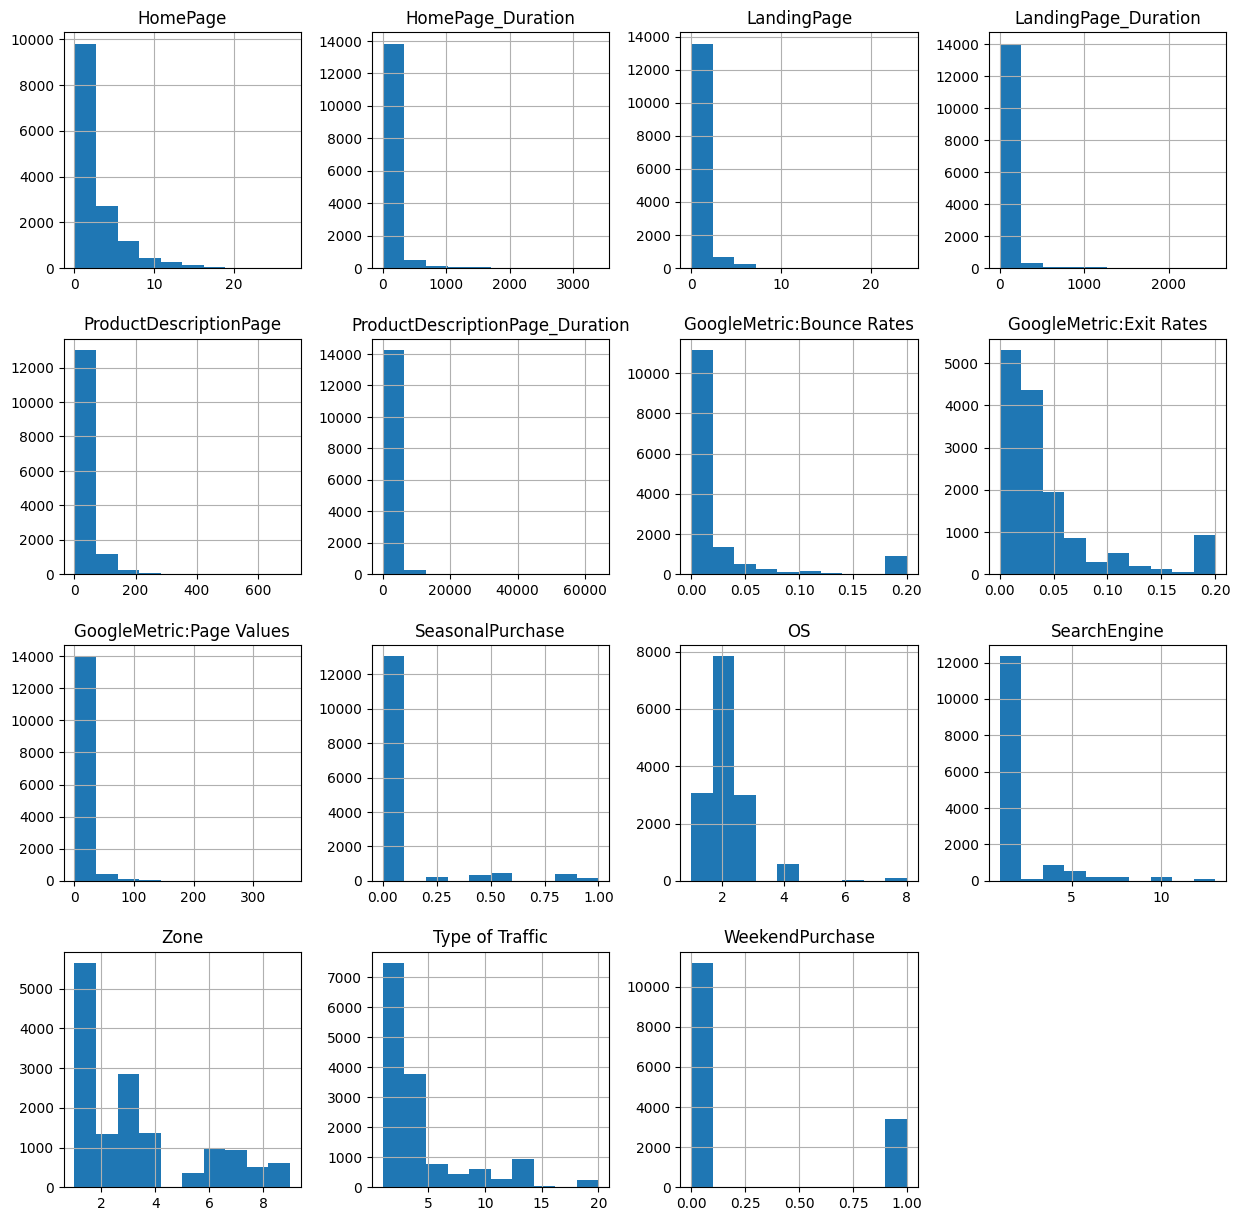

In [14]:
X.hist(figsize=(15,15))

### Correlations

<Axes: >

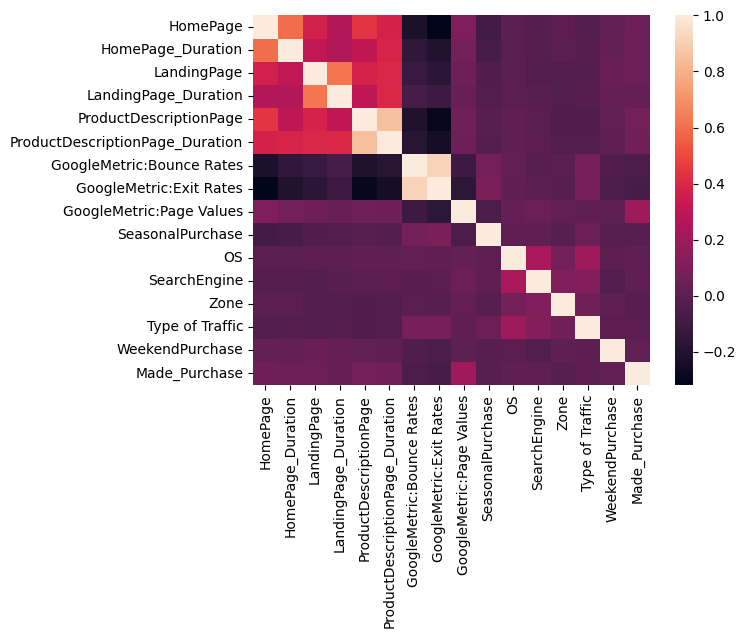

In [15]:
sns.heatmap(train_data.drop(['Month_SeasonalPurchase','CustomerType','Gender','Cookies Setting','Education','Marital Status'],axis=1).corr())

### Target variable(s)

In [16]:
y.nunique()

Made_Purchase    2
dtype: int64

In [17]:
y['Made_Purchase'].unique()

array([False,  True])

In [18]:
y.describe()

,Made_Purchase
count,14731
unique,2
top,False
freq,9065


### Insights

In [19]:
categorical_features=[
    'Month_SeasonalPurchase',
    'CustomerType','Gender',
    'Cookies Setting','Education',
    'Marital Status','WeekendPurchase',
    'Zone',
    'Type of Traffic',
    'SearchEngine',
    'OS']
numerical_features=[
    'HomePage',
    'HomePage_Duration',
    'LandingPage',
    'LandingPage_Duration',
    'ProductDescriptionPage',
    'ProductDescriptionPage_Duration',
    'GoogleMetric:Bounce Rates',
    'GoogleMetric:Exit Rates',
    'GoogleMetric:Page Values',
    'SeasonalPurchase']

In [20]:
dtypes={}
for i in numerical_features:
    dtypes[i]='float64'
for i in categorical_features:
    dtypes[i]='category'
dtypes

{'HomePage': 'float64',
 'HomePage_Duration': 'float64',
 'LandingPage': 'float64',
 'LandingPage_Duration': 'float64',
 'ProductDescriptionPage': 'float64',
 'ProductDescriptionPage_Duration': 'float64',
 'GoogleMetric:Bounce Rates': 'float64',
 'GoogleMetric:Exit Rates': 'float64',
 'GoogleMetric:Page Values': 'float64',
 'SeasonalPurchase': 'float64',
 'Month_SeasonalPurchase': 'category',
 'CustomerType': 'category',
 'Gender': 'category',
 'Cookies Setting': 'category',
 'Education': 'category',
 'Marital Status': 'category',
 'WeekendPurchase': 'category',
 'Zone': 'category',
 'Type of Traffic': 'category',
 'SearchEngine': 'category',
 'OS': 'category'}

# Data pre-processing

In [21]:
X['Gender'] = X['Gender'].replace('Not Specified', np.nan)
X['Education'] = X['Education'].replace('Not Specified', 'Others')

#submission_data['Gender'] = submission_data['Gender'].replace('Not Specified', np.nan)
submission_data['Education'] = submission_data['Education'].replace('Not Specified', 'Others')

### Data Cleaning

In [22]:
combined_imputer=ColumnTransformer(transformers=[
    ('numerical_imputer',KNNImputer(n_neighbors=120),numerical_features),
    ('catagorical_imputer',SimpleImputer(strategy='most_frequent'),categorical_features)
])

In [23]:
X_imputed=combined_imputer.fit_transform(X)
sub_imputed=combined_imputer.fit_transform(submission_data)

In [24]:
X_imputed = pd.DataFrame(data=X_imputed, columns=numerical_features + categorical_features).astype(dtypes)
sub_imputed = pd.DataFrame(data=sub_imputed, columns=numerical_features + categorical_features).astype(dtypes)

In [25]:
X_imputed.isna().sum()

HomePage                           0
HomePage_Duration                  0
LandingPage                        0
LandingPage_Duration               0
ProductDescriptionPage             0
ProductDescriptionPage_Duration    0
GoogleMetric:Bounce Rates          0
GoogleMetric:Exit Rates            0
GoogleMetric:Page Values           0
SeasonalPurchase                   0
Month_SeasonalPurchase             0
CustomerType                       0
Gender                             0
Cookies Setting                    0
Education                          0
Marital Status                     0
WeekendPurchase                    0
Zone                               0
Type of Traffic                    0
SearchEngine                       0
OS                                 0
dtype: int64

In [26]:
""" X_imputed['Education'][X_imputed['Education']=='Not Specified']='Others'
sub_imputed['Education'][sub_imputed['Education']=='Not Specified']='Others' """

" X_imputed['Education'][X_imputed['Education']=='Not Specified']='Others'\nsub_imputed['Education'][sub_imputed['Education']=='Not Specified']='Others' "

### Data Scaling

In [27]:
scaler=ColumnTransformer(
    transformers=[
        ('Robust_scaler',RobustScaler(),numerical_features),
        ('pass','passthrough',categorical_features)
    ]
)

In [28]:
X_scaled=scaler.fit_transform(X_imputed)
sub_scaled=scaler.fit_transform(sub_imputed)

In [29]:
X_scaled=pd.DataFrame(data=X_scaled,columns=numerical_features + categorical_features).astype(dtypes)
sub_scaled=pd.DataFrame(data=sub_scaled,columns=numerical_features + categorical_features).astype(dtypes)

In [30]:
X_imputed.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase
count,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000
mean,2.243404,79.050500,0.489757,33.409555,31.499401,1182.584645,0.023570,0.044732,4.812659,0.064059
std,3.277442,178.534319,1.248281,139.534841,44.749077,2001.086155,0.050170,0.049883,16.815108,0.201565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,176.500000,0.000000,0.014667,0.000000,0.000000
50%,1.000000,5.500000,0.000000,0.000000,17.000000,586.000000,0.003704,0.026479,0.000000,0.000000
75%,3.120833,91.000000,0.000000,0.000000,37.000000,1430.433648,0.018182,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [31]:
X_scaled.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase
count,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000
mean,0.398421,0.808247,0.489757,33.409555,0.483313,0.475771,1.092674,0.516585,4.812659,0.064059
std,1.050182,1.961916,1.248281,139.534841,1.491636,1.595847,2.759325,1.411792,16.815108,0.201565
min,-0.320427,-0.060440,0.000000,0.000000,-0.566667,-0.467329,-0.203704,-0.749408,0.000000,0.000000
25%,-0.320427,-0.060440,0.000000,0.000000,-0.333333,-0.326572,-0.203704,-0.334313,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.679573,0.939560,0.000000,0.000000,0.666667,0.673428,0.796296,0.665687,0.000000,0.000000
max,8.331108,37.288462,24.000000,2549.375000,22.933333,50.550938,10.796296,4.910970,361.763742,1.000000


### Outliers

In [32]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(X_scaled[numerical_features])
y_p = lof.fit_predict(sub_scaled[numerical_features])

X_noOutlier=X_scaled[y_pred_lof != -1]
y = y[y_pred_lof != -1]
sub_noOutlier=sub_scaled

In [33]:
X_noOutlier.shape

(13259, 21)

### Encoding

In [34]:
X_noOutlier[categorical_features].sample(10)

,Month_SeasonalPurchase,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Zone,Type of Traffic,SearchEngine,OS
7734,Nov,New_Visitor,Female,ALL,Diploma,Other,1.0,1.0,2.0,1.0,1.0
13567,Mar,Returning_Visitor,Female,Required,Others,Other,0.0,1.0,2.0,5.0,2.0
5201,Jul,Returning_Visitor,Female,Required,Others,Single,0.0,3.0,2.0,2.0,1.0
8240,Nov,Returning_Visitor,Female,Required,Others,Single,0.0,4.0,2.0,2.0,3.0
12025,Nov,Returning_Visitor,Male,ALL,Others,Married,0.0,6.0,2.0,2.0,2.0
13915,Nov,Returning_Visitor,Male,ALL,Others,Other,0.0,1.0,13.0,2.0,3.0
11109,May,Returning_Visitor,Male,ALL,Graduate,Single,1.0,3.0,4.0,2.0,3.0
2927,May,Returning_Visitor,Male,Required,Others,Single,0.0,1.0,4.0,2.0,2.0
7711,Nov,Returning_Visitor,Female,ALL,Others,Single,1.0,1.0,2.0,2.0,3.0
7789,Nov,Returning_Visitor,Female,Required,Others,Other,0.0,1.0,13.0,2.0,2.0


The features 'WekendPurchase', 'Zone', 'Type of Traffic', 'SearchEngine', 'OS' already seem to be encoded

In [35]:
categorical_features

['Month_SeasonalPurchase',
 'CustomerType',
 'Gender',
 'Cookies Setting',
 'Education',
 'Marital Status',
 'WeekendPurchase',
 'Zone',
 'Type of Traffic',
 'SearchEngine',
 'OS']

In [36]:
encoder = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(), ['Month_SeasonalPurchase', 'CustomerType']),
        ('no_order_encoder', OrdinalEncoder(), ['Gender', 'Marital Status', 'Cookies Setting']),
        ('ordinal_encoder', OrdinalEncoder(categories=[['Others', 'Diploma', 'Graduate']]), ['Education']),
        ('pass', 'passthrough', numerical_features + ['WeekendPurchase', 'Zone', 'Type of Traffic', 'SearchEngine', 'OS'])
    ]
)

In [37]:
X_processed=encoder.fit_transform(X_noOutlier)
sub_processed=encoder.fit_transform(sub_noOutlier)

In [38]:
one_hot_feature_names = encoder.named_transformers_['OneHotEncoder'].get_feature_names_out(['Month_SeasonalPurchase', 'CustomerType']).tolist()
no_order_feature_names = ['Gender', 'Marital Status', 'Cookies Setting']
ordinal_feature_names = ['Education']
passthrough_feature_names = numerical_features +['WeekendPurchase', 'Zone', 'Type of Traffic', 'SearchEngine', 'OS']
final=one_hot_feature_names+no_order_feature_names+ordinal_feature_names+passthrough_feature_names

In [39]:
X_processed=pd.DataFrame(data=X_processed,columns=final)
sub_processed=pd.DataFrame(data=sub_processed,columns=final)

# Train and test data split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y.to_numpy().ravel(), test_size=0.2, random_state=42)


In [41]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

### Submission function

In [42]:
def submit(estimator):
    sub = pd.DataFrame(estimator.predict(
        sub_processed), columns=['Made_Purchase'])
    sub.index.name = 'id'
    sub.to_csv("submission.csv", encoding='utf-8')

In [43]:
all_models = {}

# Base Line model

### Classifier Logistic regressor

In [44]:
base_clf = LogisticRegressionCV(cv=5, random_state=42, max_iter=1000)

### Train and predict

In [45]:
base_clf.fit(X_train,y_train)

LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)

In [46]:
all_models['Logistic Regression'] = base_clf

In [47]:
y_pred_log = base_clf.predict(X_test)

### Scores

In [48]:
print(classification_report(y_pred_log,y_test))

              precision    recall  f1-score   support

       False       0.95      0.67      0.79      2378
        True       0.20      0.72      0.31       274

    accuracy                           0.67      2652
   macro avg       0.58      0.69      0.55      2652
weighted avg       0.88      0.67      0.74      2652



In [49]:
# submit(base_clf)

# KNN Classifier

### Classifier

In [50]:
knn_clf=KNeighborsClassifier(n_neighbors=100,n_jobs=10)

### Train and predict

In [51]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=10, n_neighbors=100)

In [52]:
all_models['KNN'] = knn_clf

In [ ]:
y_pred_knn = knn_clf.predict(X_test.values)

### Scores

In [54]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

       False       0.95      0.67      0.79      2341
        True       0.23      0.73      0.35       311

    accuracy                           0.68      2652
   macro avg       0.59      0.70      0.57      2652
weighted avg       0.86      0.68      0.74      2652



In [55]:
# submit(knn_clf)

### Hyperparameter tuning

In [56]:
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }
param_grid = {
    'n_neighbors': [11],
    'weights': ['uniform'],
    'metric': ['euclidean']
}  # Final Hypertuned Params
grid_knn_clf=GridSearchCV(knn_clf,param_grid=param_grid,cv=cv)

In [ ]:
grid_knn_clf.fit(X_train,y_train)

In [58]:
print("Best parameters: ", grid_knn_clf.best_params_)
print("Best score: ", grid_knn_clf.best_score_)

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best score:  nan


In [59]:
tuned_knn_clf=grid_knn_clf.best_estimator_
tuned_knn_clf

KNeighborsClassifier(metric='euclidean', n_jobs=10, n_neighbors=11)

In [60]:
all_models['KKN tuned'] = tuned_knn_clf

In [ ]:
y_pred_tuned_knn=tuned_knn_clf.predict(X_test.values)

In [62]:
print(classification_report(y_pred_tuned_knn,y_test))

              precision    recall  f1-score   support

       False       0.85      0.66      0.75      2138
        True       0.27      0.52      0.36       514

    accuracy                           0.64      2652
   macro avg       0.56      0.59      0.55      2652
weighted avg       0.74      0.64      0.67      2652



In [63]:
# submit(tuned_knn_clf)

# SVM Classifier

### Classifier

In [64]:
svc_classifier=SVC()

### Train and predict

In [65]:
svc_classifier.fit(X_train,y_train)

SVC()

In [66]:
all_models['SVM'] = svc_classifier

In [67]:
y_pred_svc=svc_classifier.predict(X_test)

### Scores

In [68]:
print(classification_report(y_pred_svc,y_test))

              precision    recall  f1-score   support

       False       0.96      0.66      0.79      2414
        True       0.18      0.74      0.29       238

    accuracy                           0.67      2652
   macro avg       0.57      0.70      0.54      2652
weighted avg       0.89      0.67      0.74      2652



### Hyperparameter tuning

In [69]:
# param_grid = {'C': [0.01, 0.1, 1, 10]}
param_grid = {'C': [10]}  # Final Hypertuned Params
grid_svm_clf=GridSearchCV(svc_classifier,param_grid=param_grid,cv=cv)

In [70]:
grid_svm_clf.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=SVC(), param_grid={'C': [10]})

In [71]:
print("Best parameters: ", grid_svm_clf.best_params_)
print("Best score: ", grid_svm_clf.best_score_)

Best parameters:  {'C': 10}
Best score:  0.6598963242224316


In [72]:
tuned_svm_clf=grid_svm_clf.best_estimator_
tuned_svm_clf

SVC(C=10)

In [73]:
all_models['SVM tuned'] = tuned_svm_clf

In [74]:
y_pred_tuned_svc=tuned_svm_clf.predict(X_test)

In [75]:
print(classification_report(y_pred_tuned_svc,y_test))

              precision    recall  f1-score   support

       False       0.95      0.67      0.78      2355
        True       0.21      0.71      0.33       297

    accuracy                           0.67      2652
   macro avg       0.58      0.69      0.56      2652
weighted avg       0.87      0.67      0.73      2652



In [76]:
# submit(tuned_svm_clf)

# XGBoost

### Classifier

In [77]:
xgb = XGBClassifier()

### Train and predict

In [ ]:
xgb.fit(X_train,y_train)

In [79]:
all_models['XGB'] = xgb

In [ ]:
y_pred_xgbc=xgb.predict(X_test)

### Scores

In [81]:
print(classification_report(y_pred_xgbc,y_test))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72      2076
           1       0.26      0.45      0.33       576

    accuracy                           0.60      2652
   macro avg       0.53      0.55      0.52      2652
weighted avg       0.69      0.60      0.63      2652



### Hyperparameter tuning

In [82]:
# param_grid = {
#     'learning_rate': [0.1, 0.01],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [100, 500, 1000]
# }

param_grid = {
    'learning_rate': [0.01],
    'max_depth': [3],
    'n_estimators': [100]
} # Final hypertuned params
grid_xgb_clf = GridSearchCV(xgb, param_grid=param_grid, cv=cv)

In [ ]:
grid_xgb_clf.fit(X_train, y_train)

In [84]:
print("Best parameters: ", grid_xgb_clf.best_params_)
print("Best f1 score: ", grid_xgb_clf.best_score_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best f1 score:  0.6683317624882188


In [85]:
tuned_xgbc=grid_xgb_clf.best_estimator_

In [86]:
all_models['XGB tuned'] = tuned_xgbc

In [ ]:
y_pred_tuned_xgbc=tuned_xgbc.predict(X_test)

In [88]:
print(classification_report(y_pred_tuned_xgbc,y_test))

              precision    recall  f1-score   support

           0       0.94      0.67      0.79      2330
           1       0.23      0.70      0.35       322

    accuracy                           0.68      2652
   macro avg       0.59      0.69      0.57      2652
weighted avg       0.86      0.68      0.73      2652



In [89]:
# submit(tuned_xgbc)

# CART

### Classifier

In [90]:
cart=DecisionTreeClassifier(random_state=42)

### Train and predict

In [91]:
cart.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [92]:
all_models['CART'] = cart

In [93]:
y_pred_cart=cart.predict(X_test)

### Scores

In [94]:
print(classification_report(y_pred_cart,y_test))

              precision    recall  f1-score   support

       False       0.60      0.57      0.59      1746
        True       0.25      0.27      0.26       906

    accuracy                           0.47      2652
   macro avg       0.43      0.42      0.42      2652
weighted avg       0.48      0.47      0.48      2652



### Hyperparameter tuning

In [95]:
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 2, 10, 15,200]
#     'splitter': ['best', 'random']
# }
param_grid = {
    'max_depth': [2],
    'criterion': ['entropy'],
    'splitter': ['best']
} # Final hypertuned params
grid_cart_clf = GridSearchCV(cart, param_grid=param_grid, cv=cv)

In [96]:
grid_cart_clf.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy'], 'max_depth': [2],
                         'splitter': ['best']})

In [97]:
print("Best parameters: ", grid_cart_clf.best_params_)
print("Best f1 score: ", grid_cart_clf.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}
Best f1 score:  0.6598963242224317


In [98]:
tuned_cart=grid_cart_clf.best_estimator_
tuned_cart

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [99]:
all_models['CART tuned'] = tuned_cart

In [100]:
y_pred_tuned_cart=tuned_cart.predict(X_test)

In [101]:
print(classification_report(y_pred_tuned_cart,y_test))

              precision    recall  f1-score   support

       False       0.89      0.69      0.78      2148
        True       0.33      0.64      0.43       504

    accuracy                           0.68      2652
   macro avg       0.61      0.66      0.60      2652
weighted avg       0.78      0.68      0.71      2652



In [102]:
submit(tuned_cart)

# Random Forest Classifier

In [103]:
rfc = RandomForestClassifier(min_samples_split=20, max_depth=6, random_state=0)

### Train and predict

In [104]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=20, random_state=0)

In [105]:
all_models['Random Forest'] = rfc

In [106]:
y_pred_rfc = rfc.predict(X_test)

### Scores

In [107]:
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

       False       0.93      0.68      0.79      2289
        True       0.25      0.69      0.37       363

    accuracy                           0.68      2652
   macro avg       0.59      0.69      0.58      2652
weighted avg       0.84      0.68      0.73      2652



### Hyperparameter tuning

In [108]:
# param_grid = {'n_estimators': [20, 50, 100, 200],
#               'max_depth': [3, 5, 7, 9],
#               'criterion': ['gini', 'entropy', 'log_loss'],
#               'class_weight': ['balanced', 'balanced_subsample']}
param_grid = {'n_estimators': [200],
              'max_depth': [5],
              'criterion': ['entropy'],
              'class_weight': ['balanced']}  # Final Hypertuned Params
grid_rf_clf = GridSearchCV(rfc,
                               param_grid=param_grid,
                               cv=cv)

In [109]:
grid_rf_clf.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=RandomForestClassifier(max_depth=6, min_samples_split=20,
                                              random_state=0),
             param_grid={'class_weight': ['balanced'], 'criterion': ['entropy'],
                         'max_depth': [5], 'n_estimators': [200]})

In [110]:
print("Best parameters: ", grid_rf_clf.best_params_)
print("Best f1 score: ", grid_rf_clf.best_score_)

Best parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}
Best f1 score:  0.6422714420358153


In [111]:
tuned_rfc=grid_rf_clf.best_estimator_
tuned_rfc

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_split=20, n_estimators=200,
                       random_state=0)

In [112]:
all_models['Random Forest tuend'] = tuned_rfc

In [113]:
y_pred_tuned_rfc=tuned_rfc.predict(X_test)

In [114]:
print(classification_report(y_pred_tuned_rfc,y_test))

              precision    recall  f1-score   support

       False       0.85      0.69      0.76      2052
        True       0.36      0.59      0.45       600

    accuracy                           0.67      2652
   macro avg       0.61      0.64      0.60      2652
weighted avg       0.74      0.67      0.69      2652



# Bagging on RFC

### Classifier

In [115]:
bag_rfc=BaggingClassifier(base_estimator=tuned_rfc, n_estimators=50, random_state=42)

### Train and predict

In [ ]:
bag_rfc.fit(X_train,y_train)

In [117]:
all_models['RFC Bagged'] = bag_rfc

In [118]:
y_pred_bag_rfc=bag_rfc.predict(X_test)

### Scores

In [119]:
print(classification_report(y_pred_bag_rfc,y_test))

              precision    recall  f1-score   support

       False       0.84      0.69      0.76      2036
        True       0.36      0.58      0.44       616

    accuracy                           0.66      2652
   macro avg       0.60      0.63      0.60      2652
weighted avg       0.73      0.66      0.69      2652



In [120]:
# submit(bag_rfc)

# Bagging on CART

### Calssifier

In [121]:
bag_cart=BaggingClassifier(base_estimator=tuned_cart,n_estimators=50,random_state=42)

### Train and predict

In [ ]:
bag_cart.fit(X_train,y_train)

In [123]:
all_models['CART Bagged'] = bag_cart

In [124]:
y_pred_bag_cart = bag_cart.predict(X_test)

### Scores

In [125]:
print(classification_report(y_pred_bag_cart,y_test))

              precision    recall  f1-score   support

       False       0.90      0.69      0.78      2182
        True       0.31      0.65      0.42       470

    accuracy                           0.68      2652
   macro avg       0.61      0.67      0.60      2652
weighted avg       0.80      0.68      0.72      2652



### Hyperprameter tuning

In [ ]:
param_grid = {'max_samples': [0.5, 0.6, 0.7],
              'max_features': [0.5, 0.7, 0.9]}

grid_cart_bagger = GridSearchCV(bag_cart,
                              param_grid=param_grid,
                              cv=cv)

grid_cart_bagger.fit(X_train, y_train)


In [127]:
tuned_cart_bagger=grid_cart_bagger.best_estimator_
tuned_cart_bagger

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=2,
                                                        random_state=42),
                  max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=42)

In [128]:
all_models['CART Bagged tuned'] = tuned_cart_bagger

In [ ]:
tuned_cart_bagger.fit(X_train,y_train)

In [130]:
print("Best parameters: ", grid_cart_bagger.best_params_)
print("Best score: ", grid_cart_bagger.best_score_)

Best parameters:  {'max_features': 0.7, 'max_samples': 0.7}
Best score:  0.663430725730443


In [131]:
y_pred_cart_bagger=tuned_cart_bagger.predict(X_test)

In [132]:
print(classification_report(y_pred_cart_bagger,y_test))

              precision    recall  f1-score   support

       False       0.92      0.68      0.78      2242
        True       0.28      0.68      0.40       410

    accuracy                           0.68      2652
   macro avg       0.60      0.68      0.59      2652
weighted avg       0.82      0.68      0.72      2652



In [133]:
# submit(bag_cart)

# Boosting

### Adaboost

In [ ]:
abc = AdaBoostClassifier(base_estimator=tuned_cart,
                         n_estimators=50,learning_rate=0.1, random_state=42)
abc.fit(X_train, y_train)

y_pred_cart_boosted = abc.predict(X_test)


In [135]:
all_models['CART Boosted'] = abc

In [136]:
print(classification_report(y_pred_cart_boosted,y_test))

              precision    recall  f1-score   support

       False       0.92      0.68      0.78      2266
        True       0.26      0.67      0.37       386

    accuracy                           0.68      2652
   macro avg       0.59      0.67      0.58      2652
weighted avg       0.83      0.68      0.72      2652



# MLP Classifier

In [137]:
mlp = MLPClassifier()

In [138]:
param_grid = {
    'hidden_layer_sizes': [(4,),(4,4)],
    'activation': ['logistic'],
    'solver': ['lbfgs'],
    'alpha': [0.00001],
    'learning_rate': ['adaptive'],
    'max_iter': [1000],
    'random_state': [42]
} # Final Hypertuned Params
grid_mlp_clf = GridSearchCV(mlp, param_grid, cv=cv)

### Train and predict

In [ ]:
grid_mlp_clf.fit(X_train, y_train)

In [140]:
print("Best parameters: ", grid_mlp_clf.best_params_)
print("Best score: ", grid_mlp_clf.best_score_)

Best parameters:  {'activation': 'logistic', 'alpha': 1e-05, 'hidden_layer_sizes': (4, 4), 'learning_rate': 'adaptive', 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}
Best score:  0.654665409990575


In [141]:
tuned_mlp_clf=grid_mlp_clf.best_estimator_
tuned_mlp_clf

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(4, 4),
              learning_rate='adaptive', max_iter=1000, random_state=42,
              solver='lbfgs')

In [142]:
all_models['MLP'] = tuned_mlp_clf

In [143]:
y_pred_tuned_mlp_clf=tuned_mlp_clf.predict(X_test)

### Scores

In [144]:
print(classification_report(y_pred_tuned_mlp_clf,y_test))

              precision    recall  f1-score   support

       False       0.89      0.68      0.77      2169
        True       0.31      0.63      0.41       483

    accuracy                           0.67      2652
   macro avg       0.60      0.65      0.59      2652
weighted avg       0.78      0.67      0.71      2652



In [145]:
# submit(tuned_mlp_clf)

# Voting classifier

### Classifier

In [146]:
voting_clf = VotingClassifier(estimators=[('model1',tuned_cart_bagger), ('model2', tuned_cart), ('model3', tuned_mlp_clf)], voting='hard')

### Train and predict

In [ ]:
voting_clf.fit(X_train,y_train)

In [148]:
all_models['Voting'] = voting_clf

In [149]:
y_pred_voted=voting_clf.predict(X_test)

### Scores

In [150]:
print(classification_report(y_pred_voted,y_test))

              precision    recall  f1-score   support

       False       0.91      0.69      0.78      2193
        True       0.31      0.66      0.42       459

    accuracy                           0.68      2652
   macro avg       0.61      0.67      0.60      2652
weighted avg       0.80      0.68      0.72      2652



In [151]:
submit(voting_clf)

## Comparasion of models

In [152]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [153]:
accuracy = []
precision = []
recall = []
f1 = []

In [ ]:
for i in all_models.values():
    pred = i.predict(X_test.to_numpy())
    accuracy.append(accuracy_score(pred,y_test))
    precision.append(precision_score(pred,y_test))
    recall.append(recall_score(pred,y_test))
    f1.append(f1_score(pred,y_test))

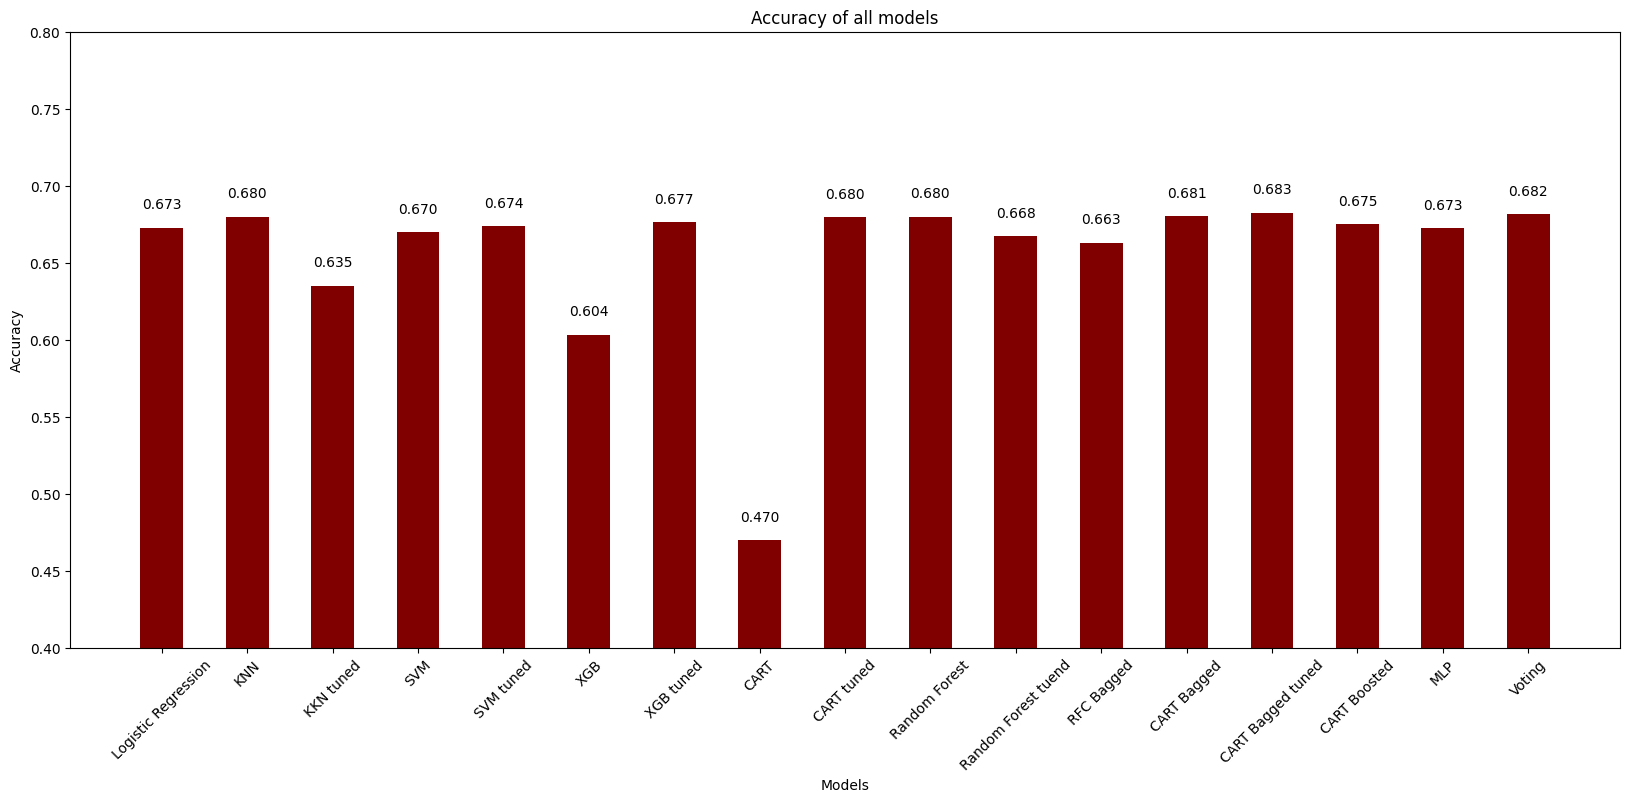

In [155]:
fig, ax = plt.subplots(figsize=(20, 8))

bars = plt.bar(list(all_models.keys()), accuracy, color='maroon', width=0.5)

plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylim(0.4, 0.80)
plt.ylabel("Accuracy")
plt.title("Accuracy of all models")

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

plt.show()

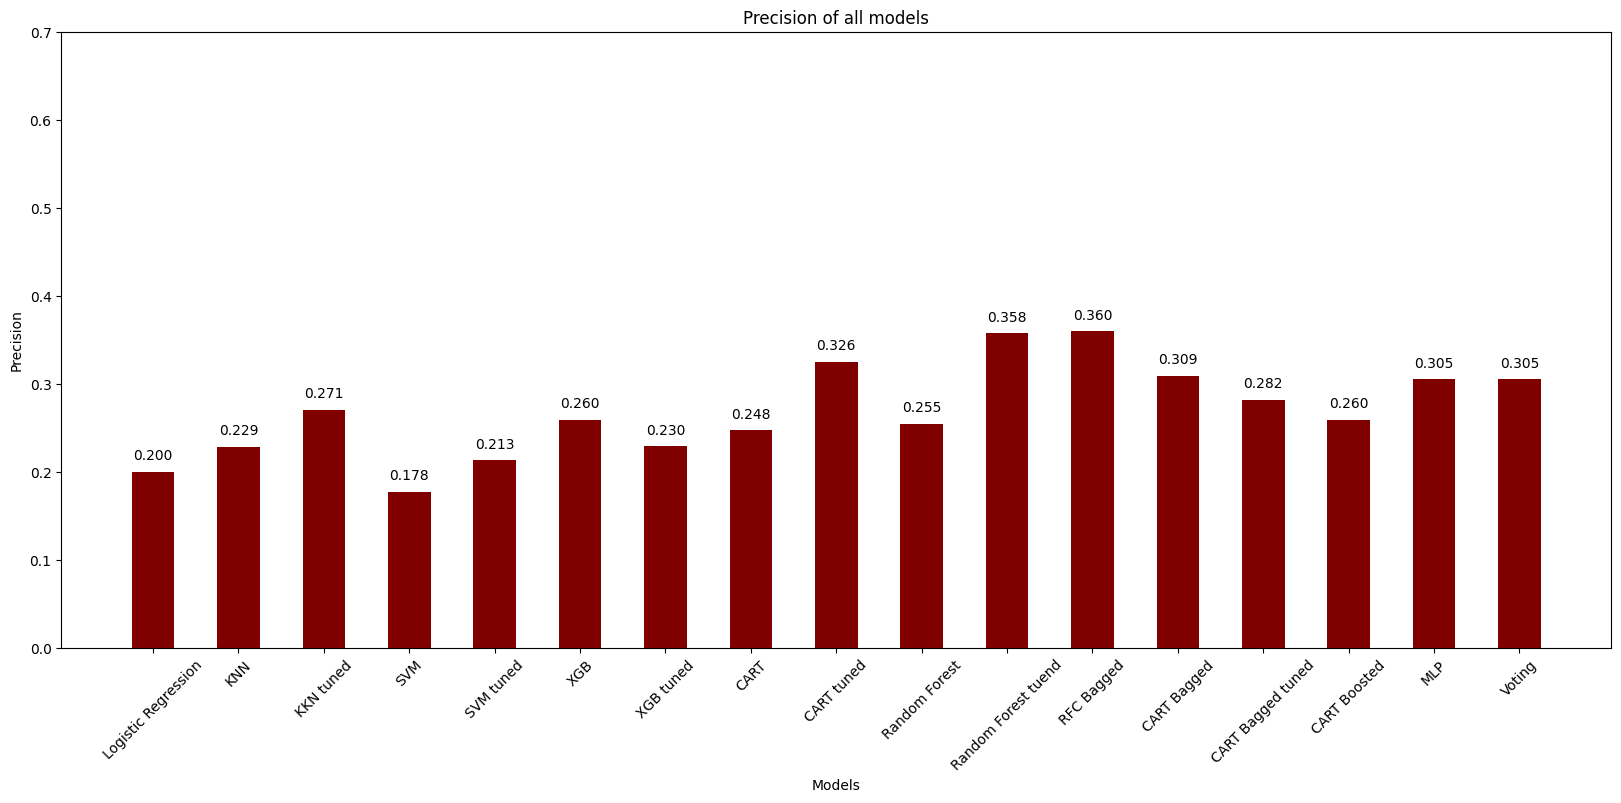

In [156]:
fig, ax = plt.subplots(figsize=(20, 8))

bars = plt.bar(list(all_models.keys()), precision, color='maroon', width=0.5)

plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylim(0.0, 0.70)
plt.ylabel("Precision")
plt.title("Precision of all models")

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

plt.show()

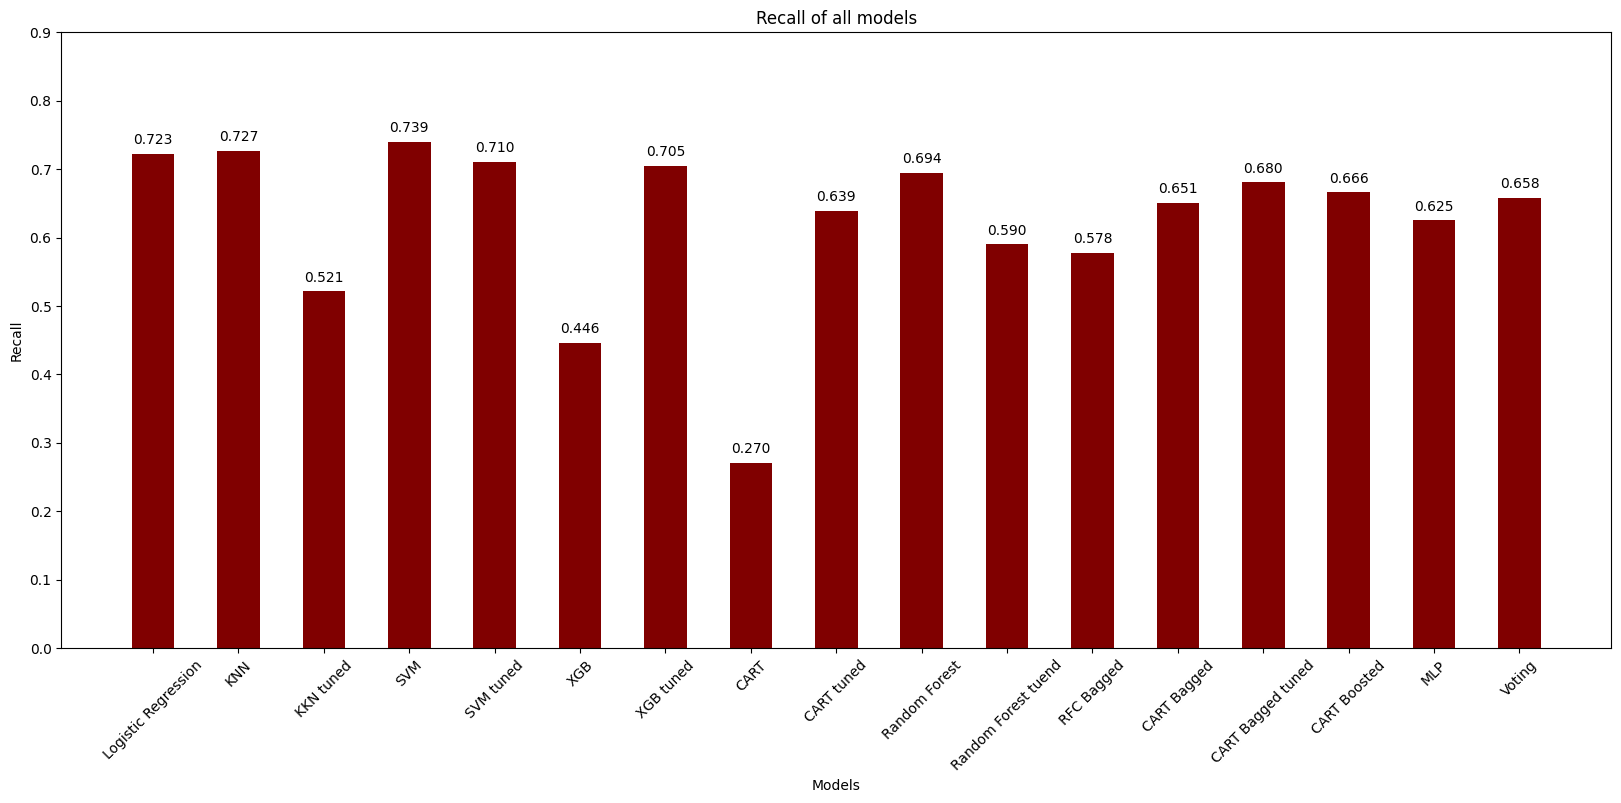

In [157]:
fig, ax = plt.subplots(figsize=(20, 8))

bars = plt.bar(list(all_models.keys()), recall, color='maroon', width=0.5)

plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylim(0.0, 0.90)
plt.ylabel("Recall")
plt.title("Recall of all models")

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

plt.show()

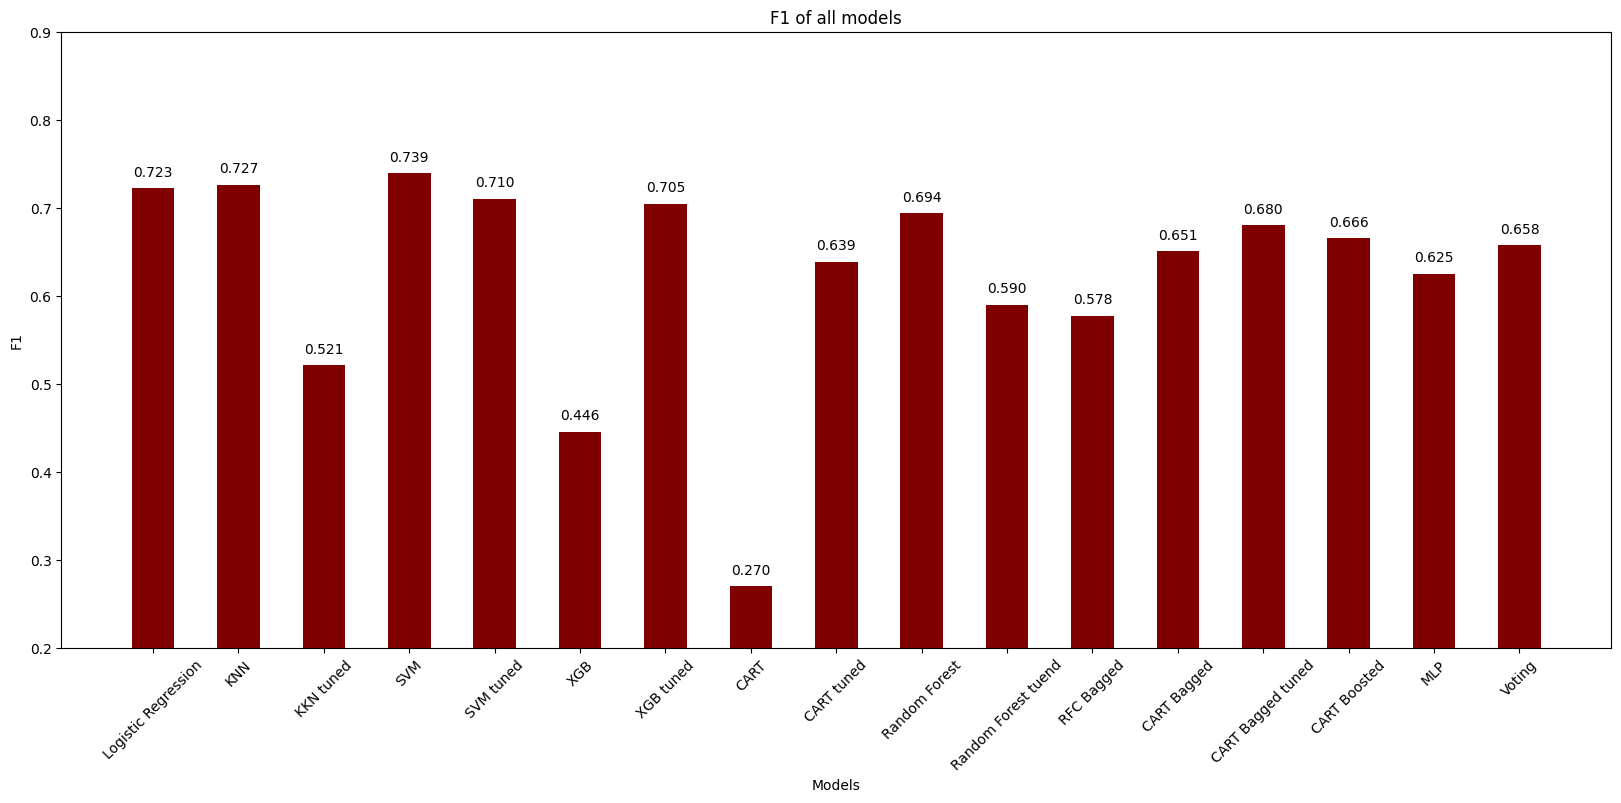

In [160]:
fig, ax = plt.subplots(figsize=(20, 8))

bars = plt.bar(list(all_models.keys()), recall, color='maroon', width=0.5)

plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylim(0.2, 0.90)
plt.ylabel("F1")
plt.title("F1 of all models")

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

plt.show()